# Koszty ubezpieczenia medycznego

In [7]:
# pip install pandas

In [8]:
# pip install matplotlib

In [9]:
# pip install seaborn

In [10]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.3/7.3 MB 17.4 MB/s eta 0:00:00
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=eccdd51db55dd5752b475ac30d156b4cb7736fe796dc813875270cb3736bdc98
  Stored in directory: c:\users\l\appdata\local\pip\cache\wheels\9b\13\01\6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Dane dotyczące kosztów ubezpieczenia medycznego
### data collection

In [12]:
path = "https://raw.githubusercontent.com/Kamil128/ProjektPraktycznyRegresja/main/data/medical_cost/medical_cost.csv"
med_cost = pd.read_csv(path)

In [13]:
med_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
med_cost.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## Data Cleaning

In [15]:
med_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Exploratory Data Analysis (EDA)

In [16]:
med_cost.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
med_cost[['smoker', 'sex', 'region']].describe()

,smoker,sex,region
count,1338,1338,1338
unique,2,2,4
top,no,male,southeast
freq,1064,676,364


D:\KURS_DATA_SCIENCE\REGRESJA_PROJEKT_PRAKT\env_2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


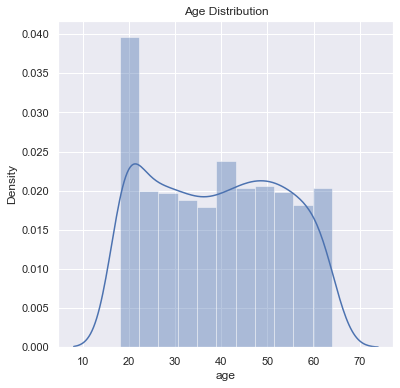

In [18]:
# kolumna 'age'
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(med_cost['age'])
plt.title('Age Distribution')
plt.show()

In [19]:
#kolumna 'sex'
med_cost['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

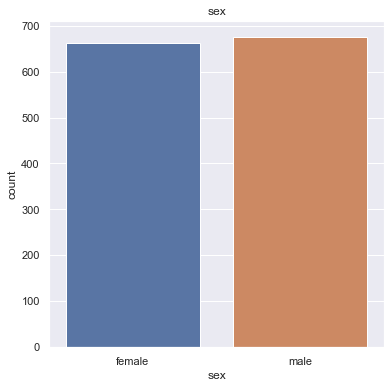

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=med_cost)
plt.title('sex')
plt.show()

D:\KURS_DATA_SCIENCE\REGRESJA_PROJEKT_PRAKT\env_2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


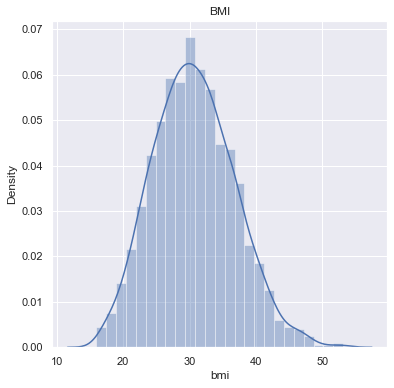

In [21]:
#kolumna 'BMI'
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(med_cost['bmi'])
plt.title('BMI')
plt.show()

### Zakresy wartości BMI:

   #### mniej niż 16 - wygłodzenie
   #### 16 - 16.99 - wychudzenie
   #### 17 - 18.49 - niedowaga
   #### 18.5 - 24.99 - wartość prawidłowa
   #### 25 - 29.99 - nadwaga
   #### 30 - 34.99 - I stopień otyłości
   #### 35 - 39.99 - II stopień otyłości
   #### powyżej 40 - otyłość skrajna



In [22]:
#kolumna 'children'
med_cost['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

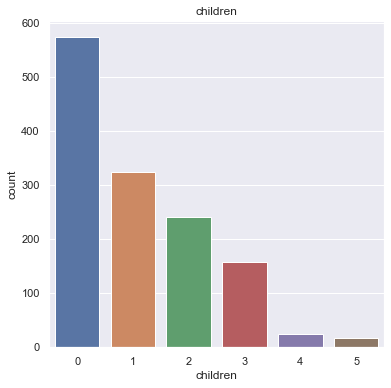

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=med_cost)
plt.title('children')
plt.show()

In [24]:
#kolumna 'smoker'
med_cost['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

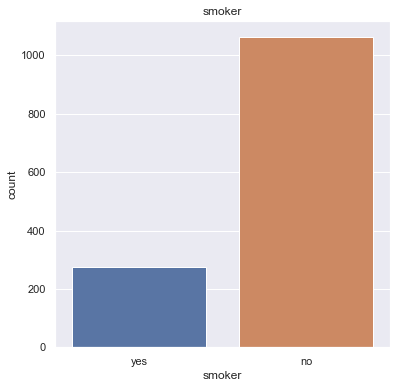

In [25]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=med_cost)
plt.title('smoker')
plt.show()

In [26]:
#kolumna 'region'
med_cost['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

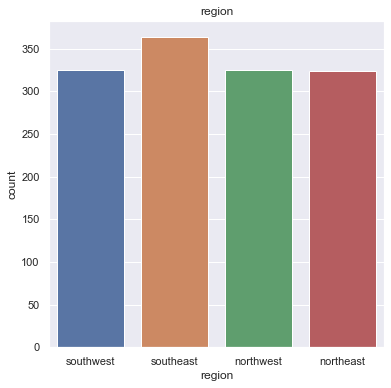

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=med_cost)
plt.title('region')
plt.show()

## Wykresy zależności wysokości opłaty od poszczególnych danych

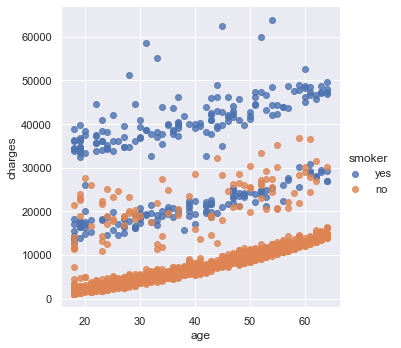

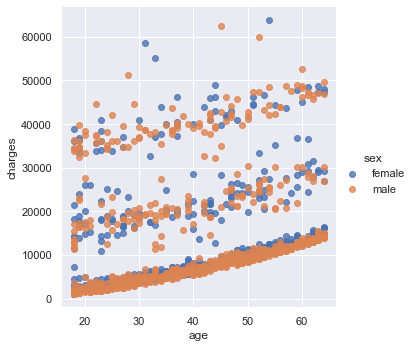

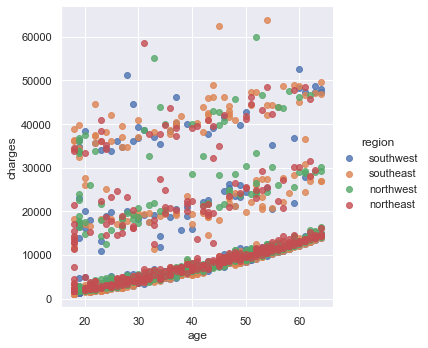

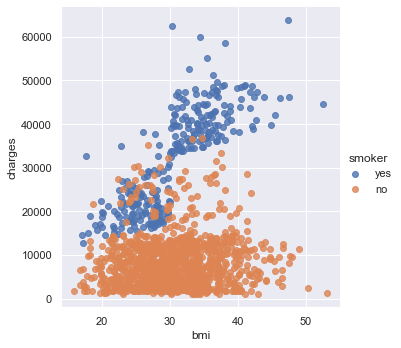

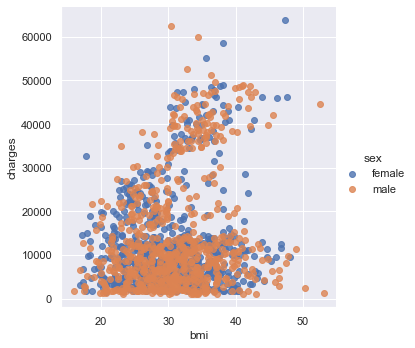

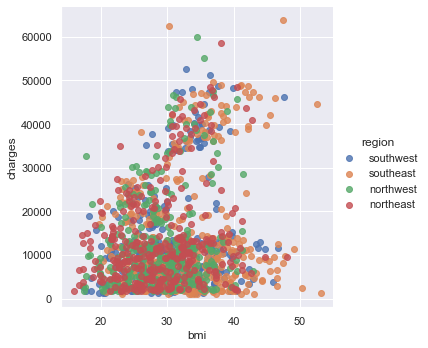

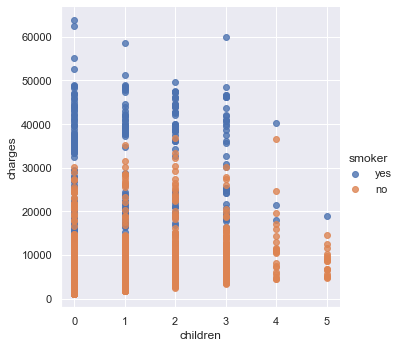

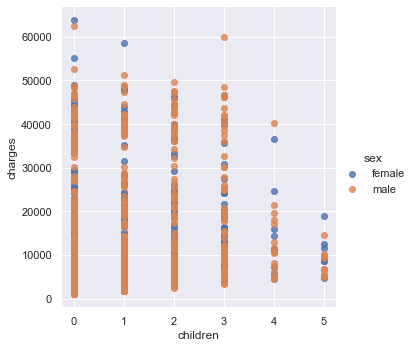

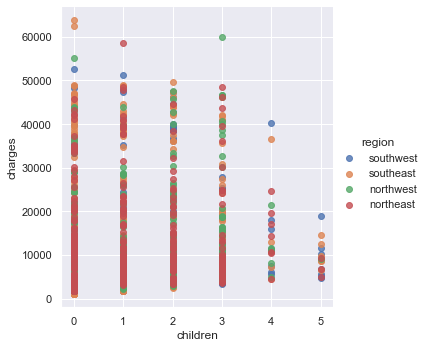

In [28]:
list_col = ['age','bmi','children']
list_col_t = ['smoker', 'sex', 'region']
for i in list_col:
    for j in list_col_t:
        sns.lmplot(x= i, y='charges', data=med_cost, fit_reg=False, hue=j)

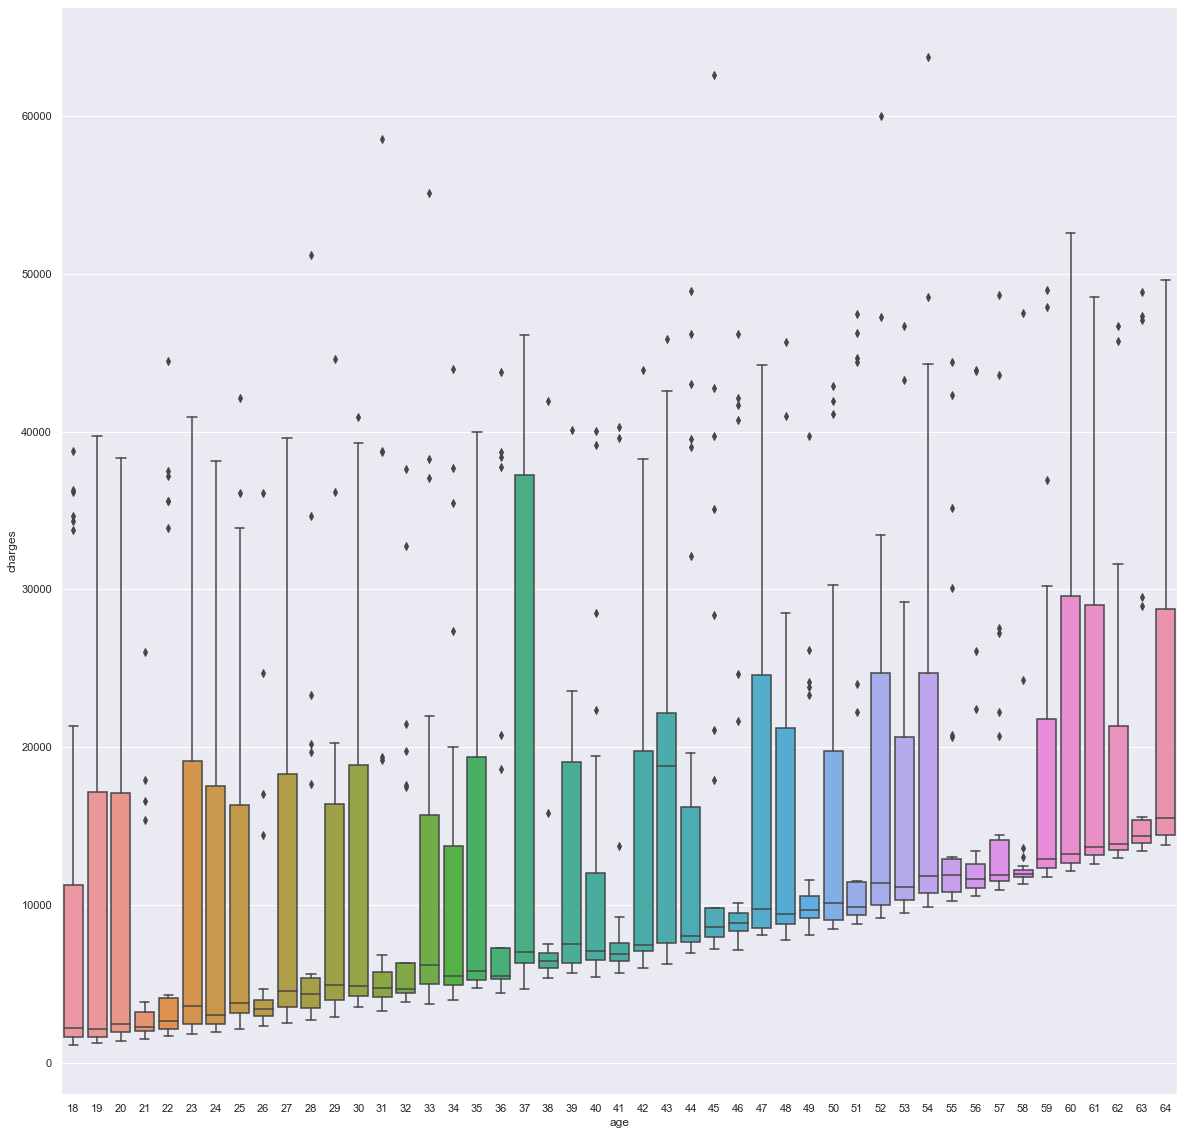

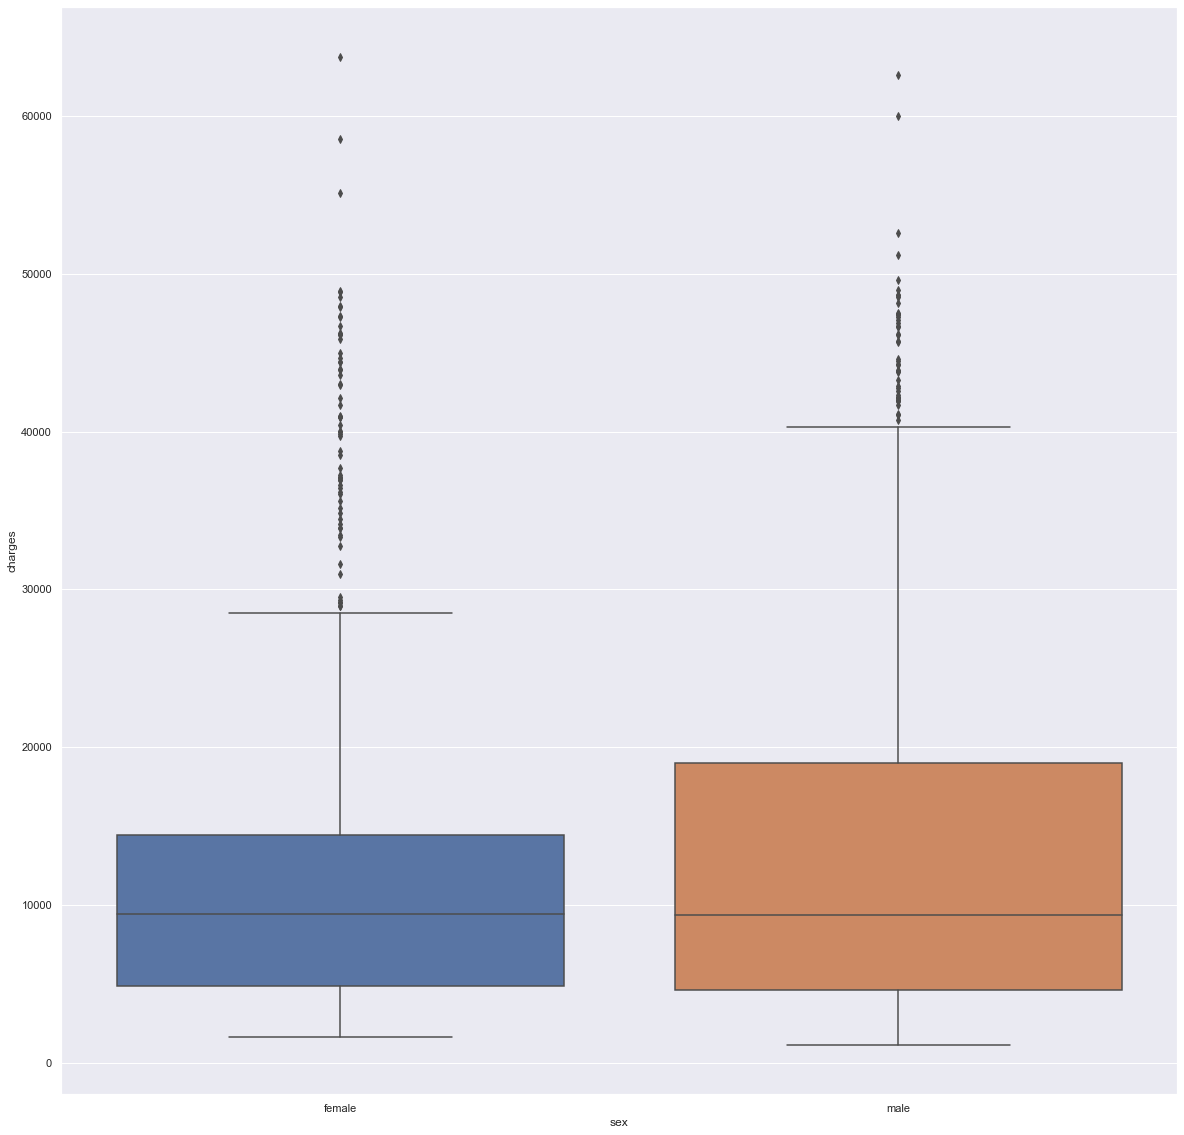

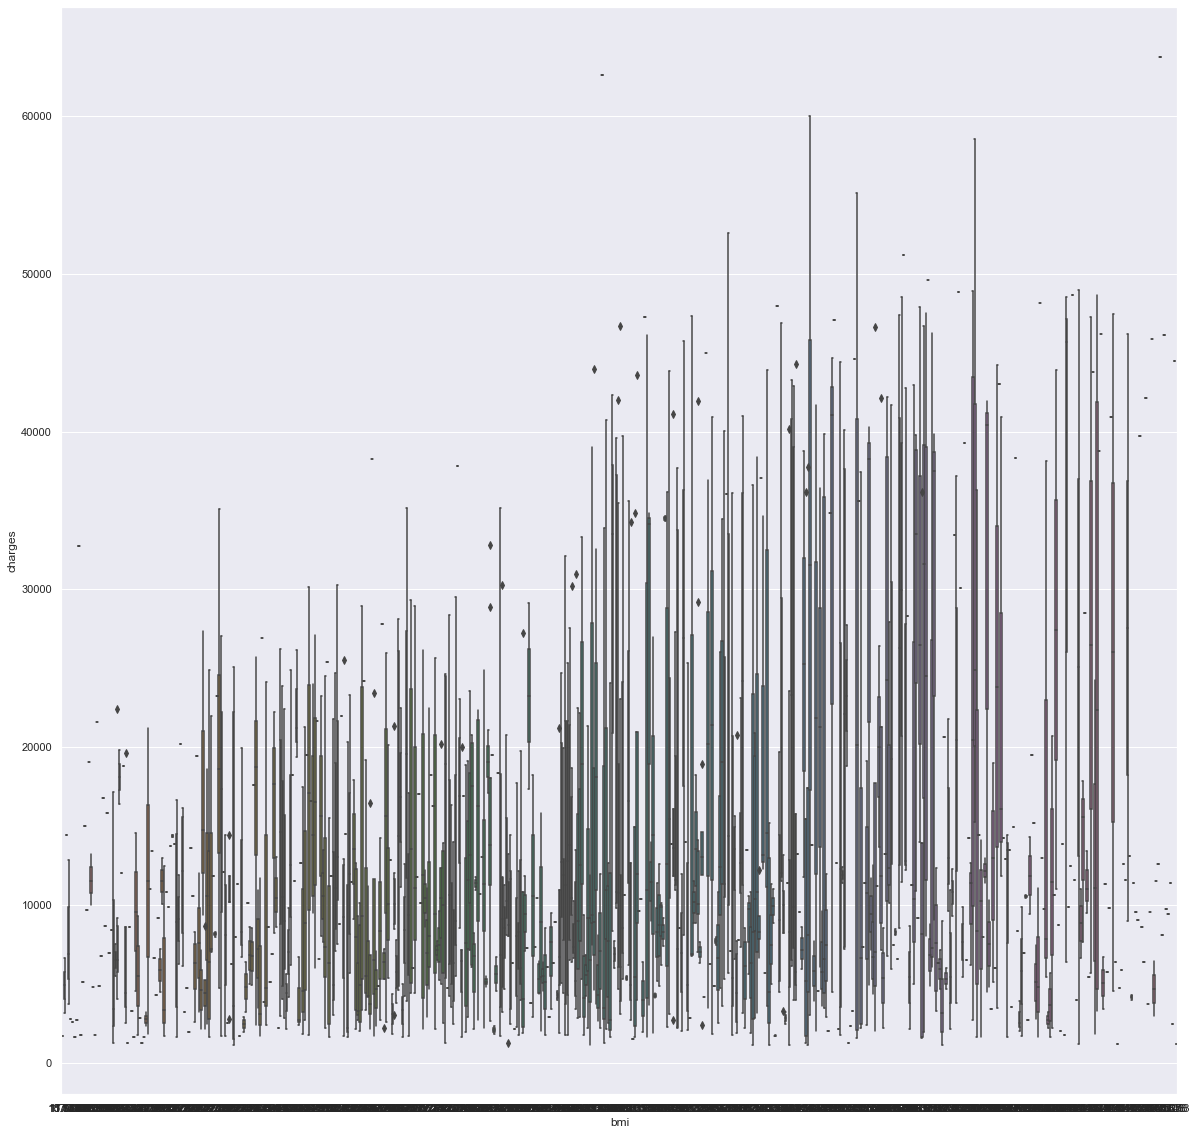

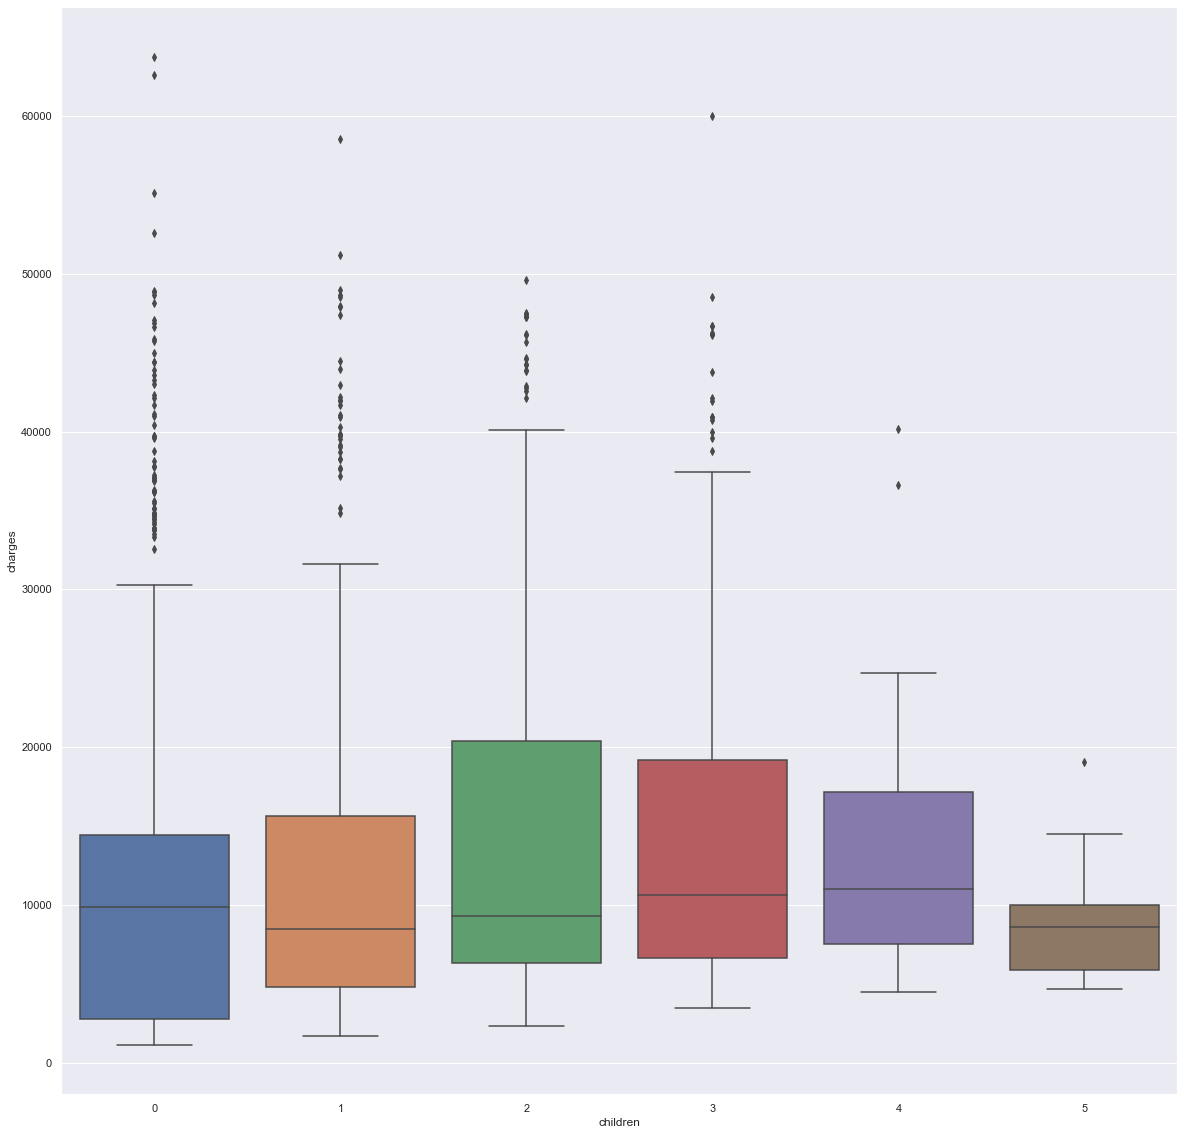

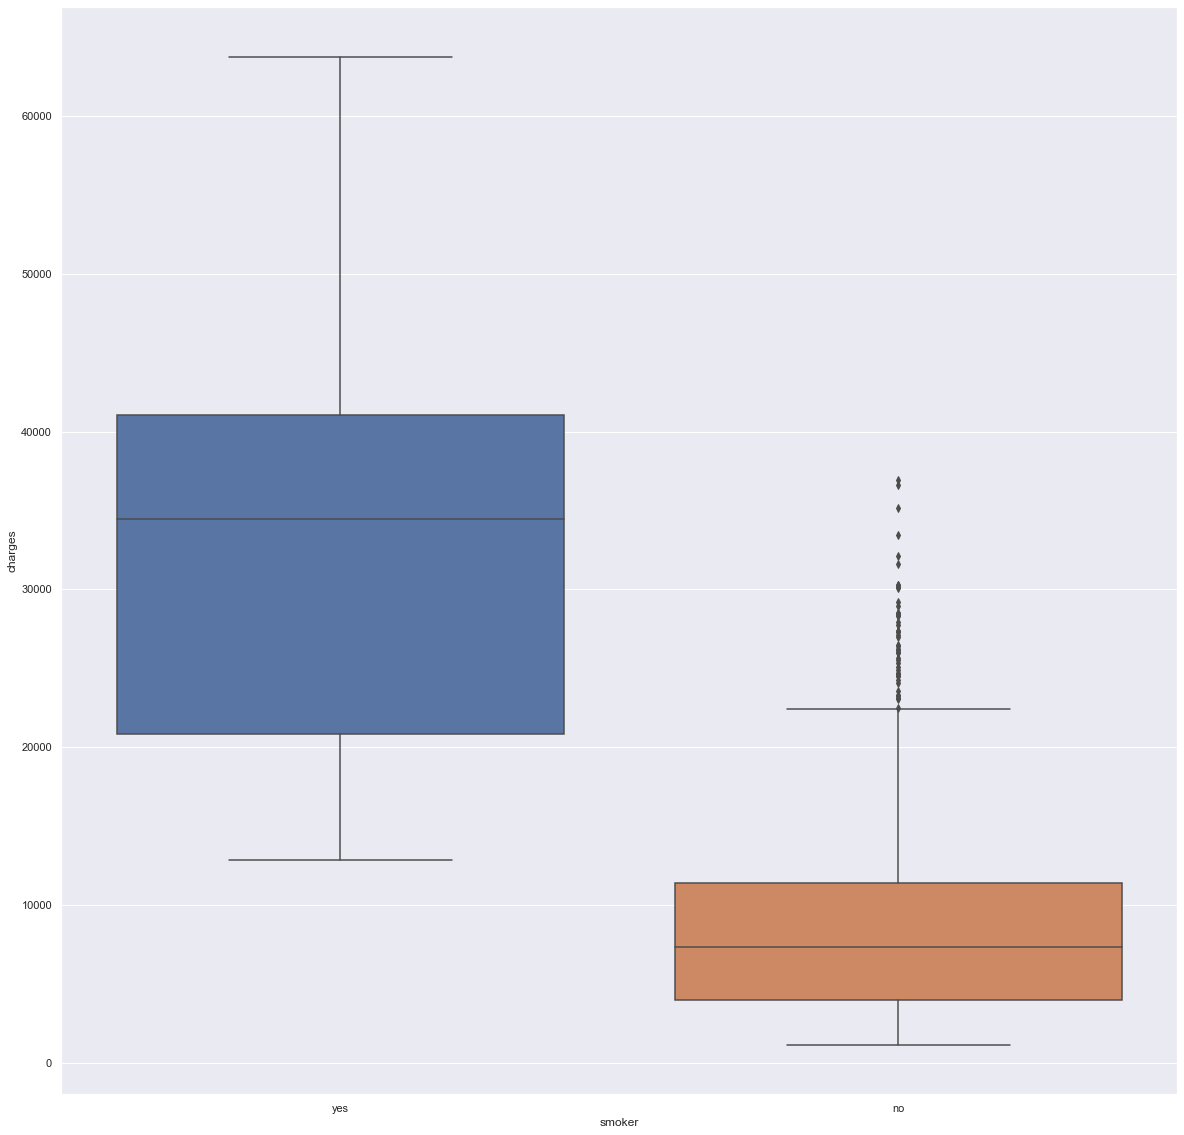

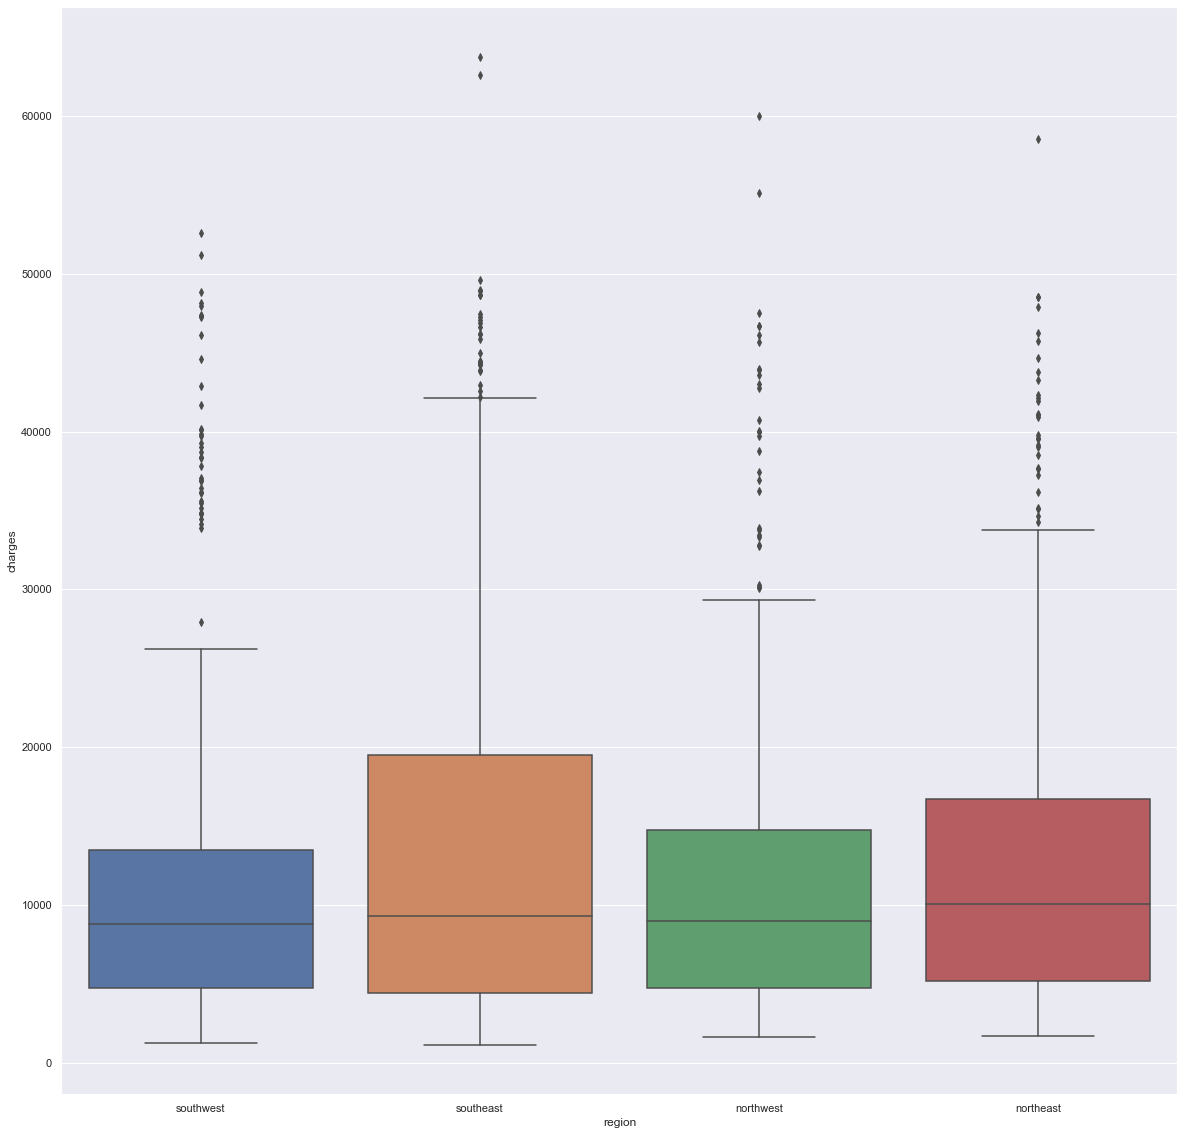

In [29]:
for i in med_cost.columns[:-1]:
    plt.figure(figsize=(20,20))
    sns.boxplot(x=med_cost[i], y=med_cost['charges'])
    plt.plot()

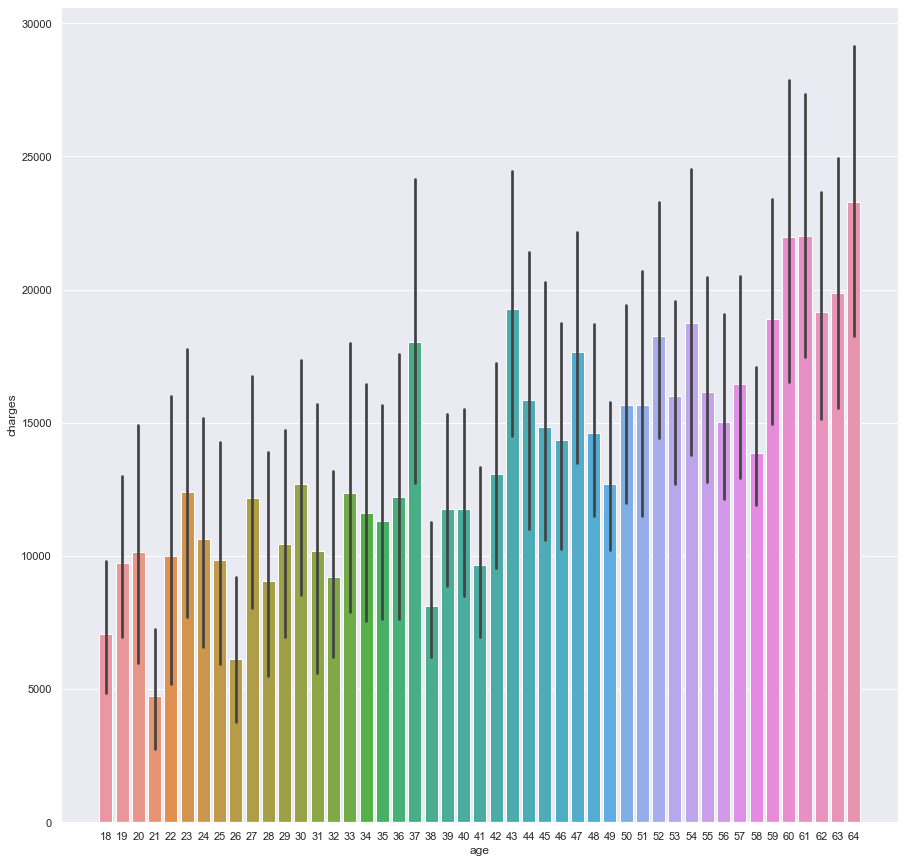

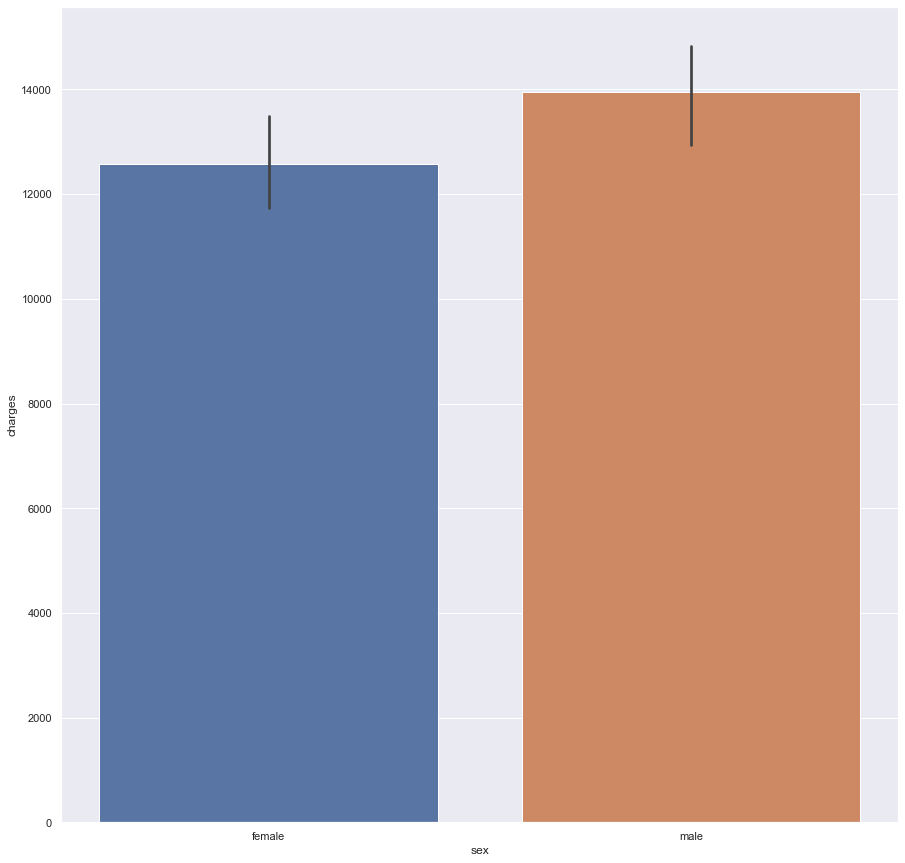

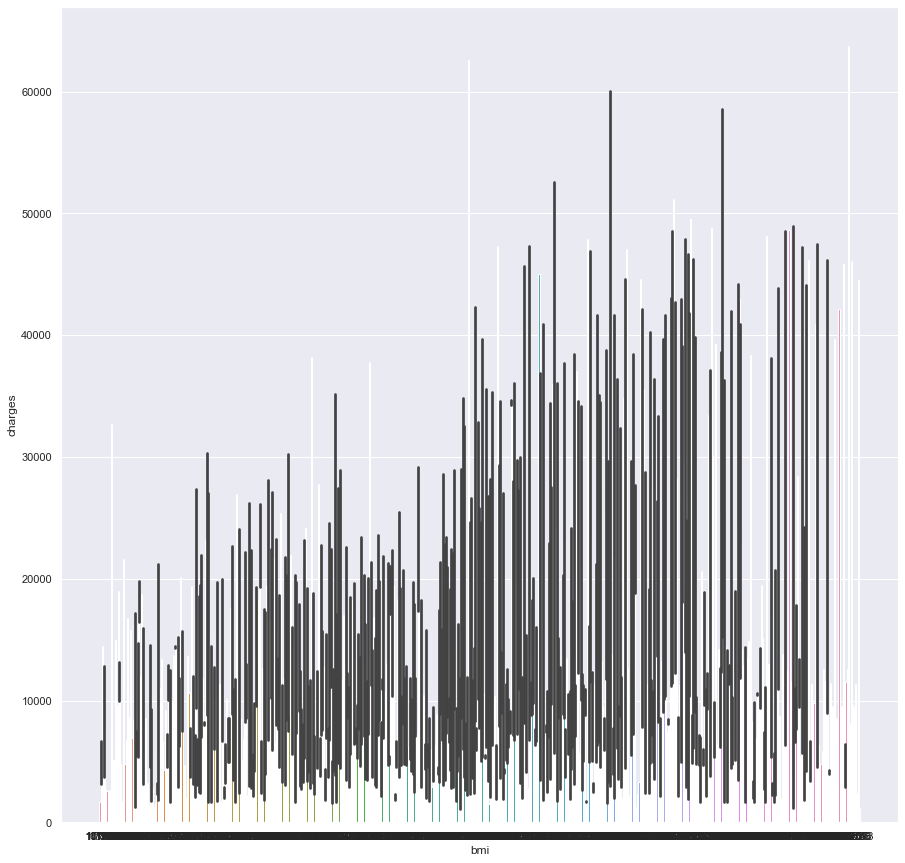

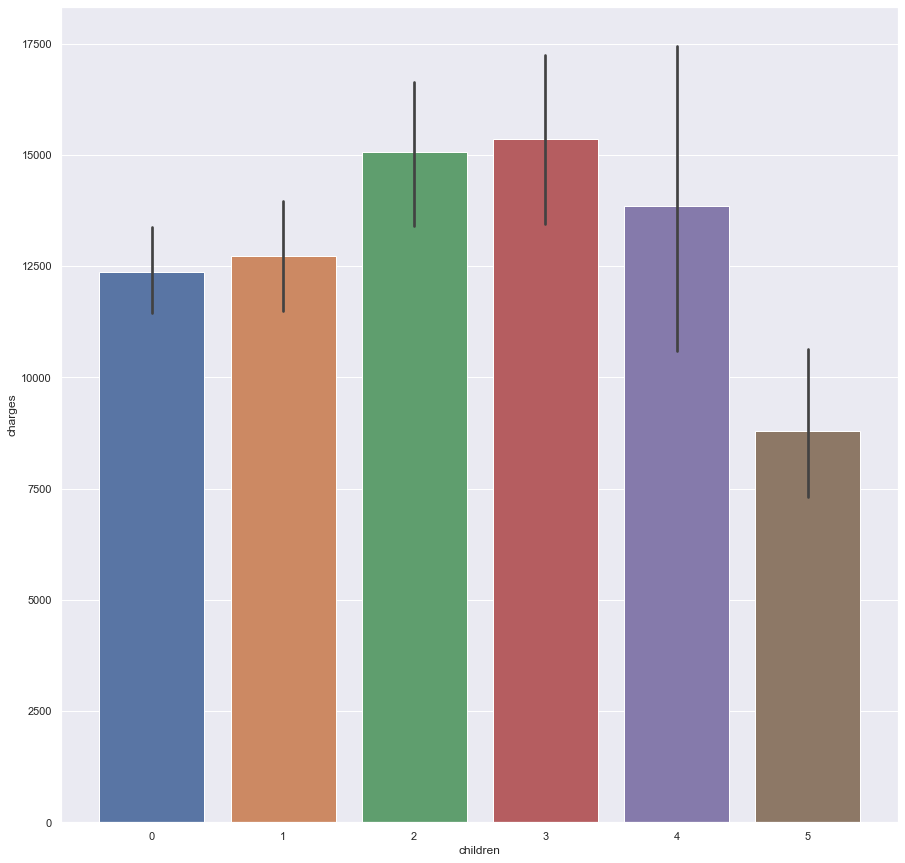

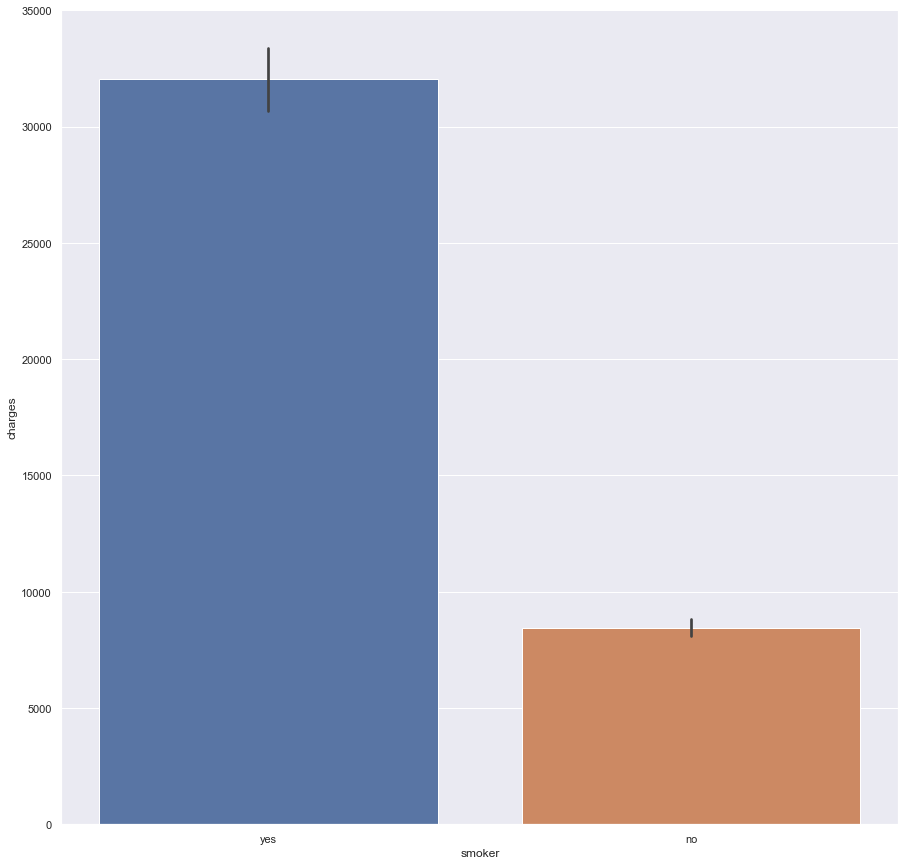

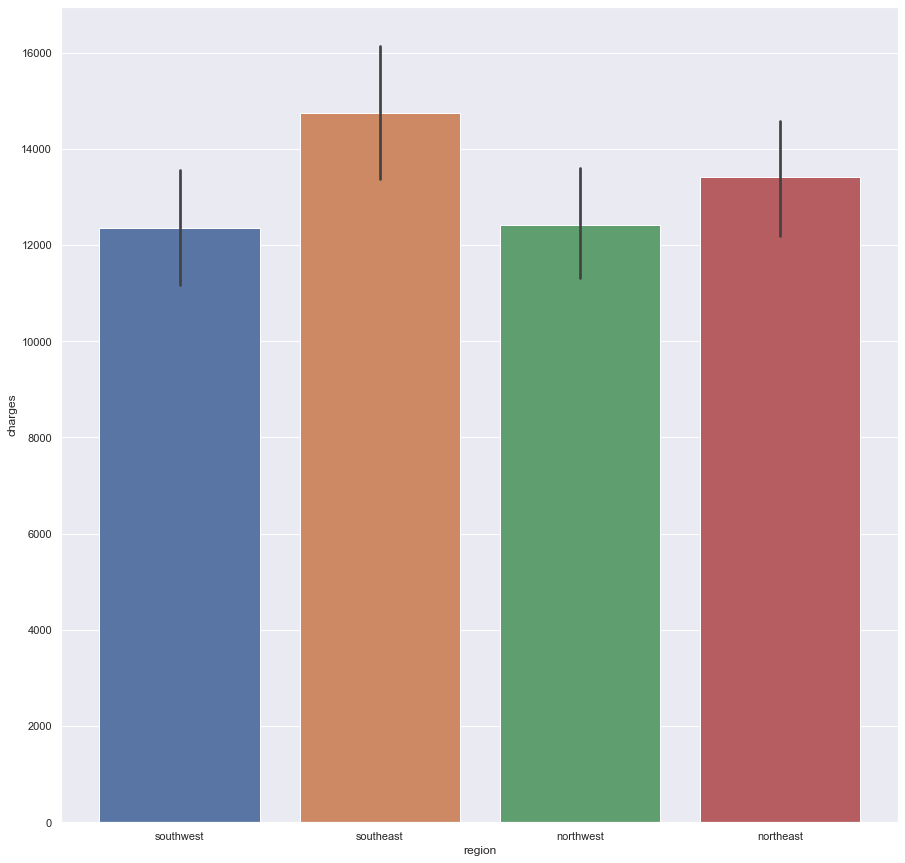

In [30]:
for i in med_cost.columns[:-1]:
    plt.figure(figsize=(15,15))
    sns.barplot(x=med_cost[i], y=med_cost['charges'])
    plt.plot()

<AxesSubplot:>

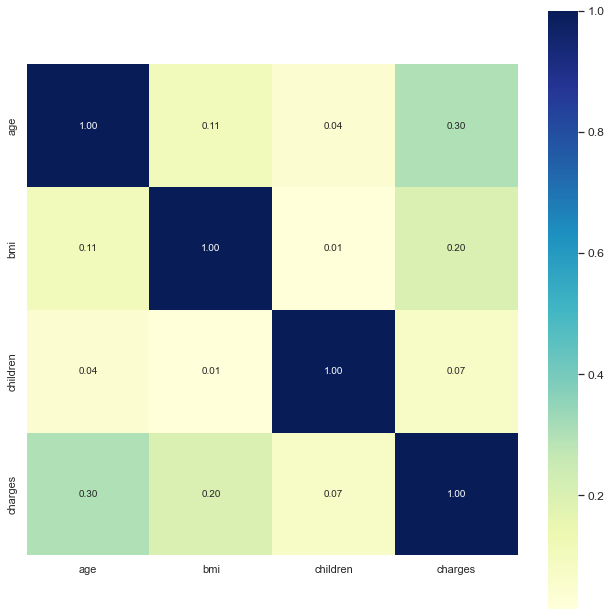

In [31]:
count_corr=med_cost.corr()
fig, ax = plt.subplots(figsize=(11,11))
sns.set(font_scale=1.1)
sns.heatmap(data=count_corr,
           square = True,
           cbar = True,
           annot = True,
           fmt = '.2f',
           annot_kws = {'size' : 10},
            cmap="YlGnBu"
            )

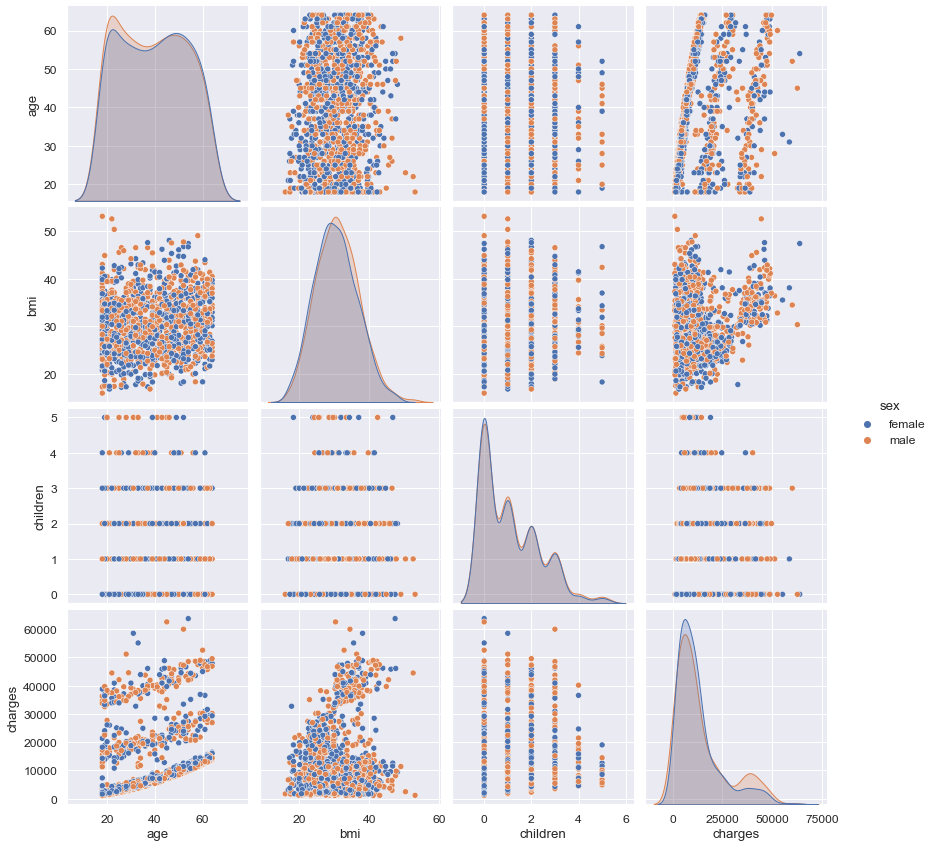

In [32]:
sns.pairplot(med_cost, height = 3, hue="sex")

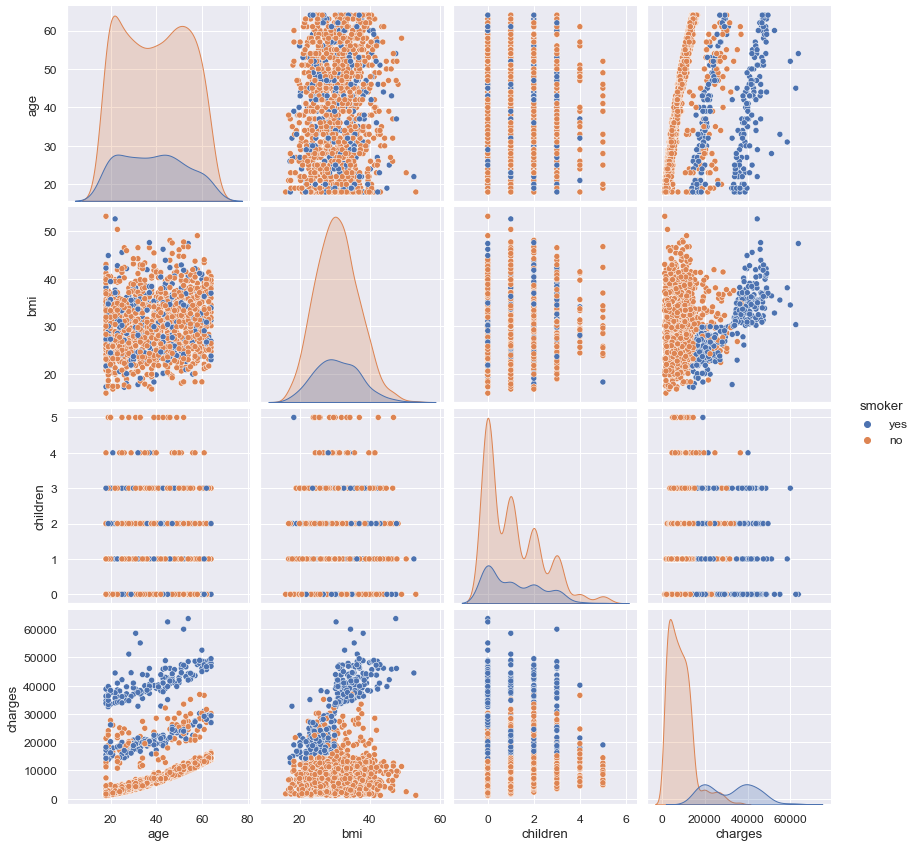

In [33]:
sns.pairplot(med_cost, height = 3, hue="smoker")

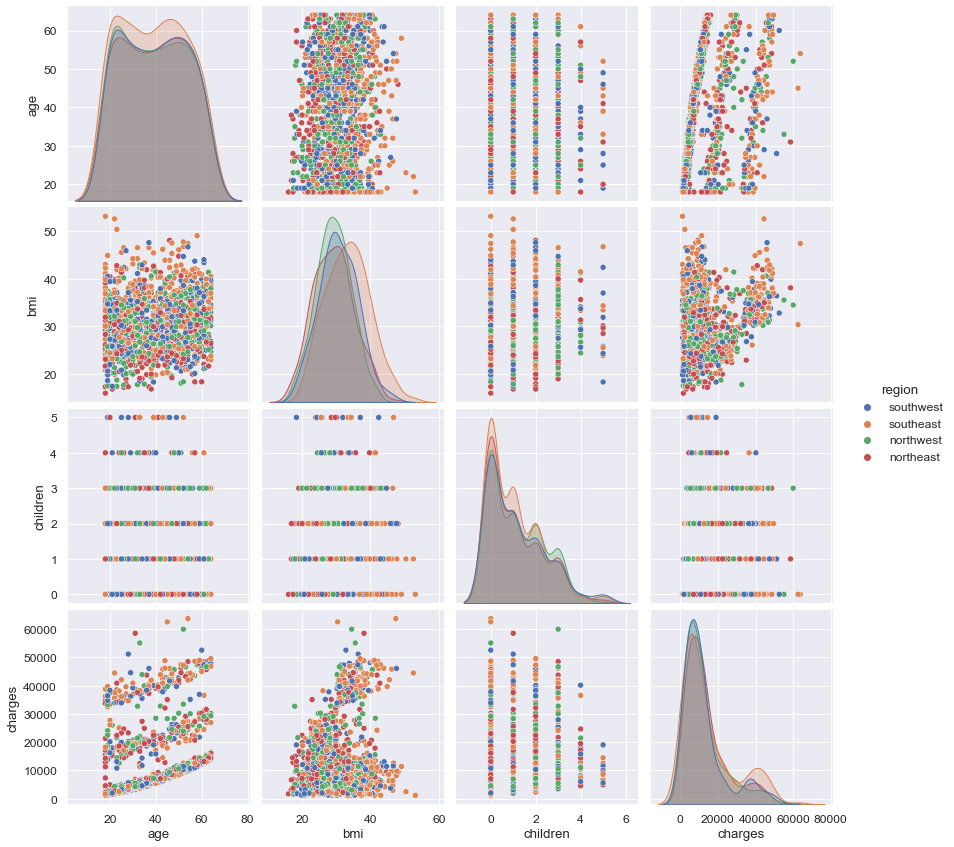

In [34]:
sns.pairplot(med_cost, height = 3, hue="region")

In [35]:
cost_bysex = med_cost[['sex', 'charges']].groupby(['sex'], as_index=False).mean().sort_values(by='charges', ascending=False)

In [36]:
cost_bysmoker = med_cost[['smoker', 'charges']].groupby(['smoker'], as_index=False).mean().sort_values(by='charges', ascending=False)

In [37]:
cost_byregion = med_cost[['region', 'charges']].groupby(['region'], as_index=False).mean().sort_values(by='charges', ascending=False)

In [38]:
cost_bysex

,sex,charges
1,male,13956.751178
0,female,12569.578844


In [39]:
cost_bysmoker

,smoker,charges
1,yes,32050.231832
0,no,8434.268298


In [40]:
cost_byregion

,region,charges
2,southeast,14735.411438
0,northeast,13406.384516
1,northwest,12417.575374
3,southwest,12346.937377


In [41]:
med_cost['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## Feature Engineering

In [42]:
sex_ohe = pd.get_dummies(med_cost['sex'])
smoker_ohe = pd.get_dummies(med_cost['smoker'])
region_ohe = pd.get_dummies(med_cost['region'])

In [43]:
med_cost_ohe = pd.concat([med_cost, sex_ohe, smoker_ohe, region_ohe], axis = 1)

In [44]:
med_cost_ohe.head()

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [45]:
med_cost_ohe.rename(columns={'no': 'no_smoker', 'yes': 'yes_smoker'}, inplace=True)

In [46]:
med_cost_ohe.head()

,age,sex,bmi,children,smoker,region,charges,female,male,no_smoker,yes_smoker,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [47]:
med_cost_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
 7   female      1338 non-null   uint8  
 8   male        1338 non-null   uint8  
 9   no_smoker   1338 non-null   uint8  
 10  yes_smoker  1338 non-null   uint8  
 11  northeast   1338 non-null   uint8  
 12  northwest   1338 non-null   uint8  
 13  southeast   1338 non-null   uint8  
 14  southwest   1338 non-null   uint8  
dtypes: float64(2), int64(2), object(3), uint8(8)
memory usage: 83.8+ KB


In [48]:
med_cost_ohe[['female','male','no_smoker','yes_smoker','northeast','northwest','southeast','southwest']] = med_cost_ohe[['female','male','no_smoker','yes_smoker','northeast','northwest','southeast','southwest']].astype('int')

In [49]:
med_cost_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
 7   female      1338 non-null   int32  
 8   male        1338 non-null   int32  
 9   no_smoker   1338 non-null   int32  
 10  yes_smoker  1338 non-null   int32  
 11  northeast   1338 non-null   int32  
 12  northwest   1338 non-null   int32  
 13  southeast   1338 non-null   int32  
 14  southwest   1338 non-null   int32  
dtypes: float64(2), int32(8), int64(2), object(3)
memory usage: 115.1+ KB


## Modelling
### Regresja liniowa

In [50]:
X = med_cost_ohe[['age','bmi','children','female','male','no_smoker','yes_smoker','northwest','northwest','southeast','southwest']]
y = med_cost_ohe['charges']

In [51]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X) # transformacja tak aby dane były wyśrodkowane

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #rozbicie na zbior uczacy i testowy

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

mse_rl = mean_squared_error(y_test, y_test_pred)
r_rl = r2_score(y_test, y_test_pred)

print('MSE na próbkach uczących: %.3f, testowych: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('Współczynnik R^2 dla danych uczących: %.3f, testowych: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE na próbkach uczących: 36596356.827, testowych: 36444514.475
Współczynnik R^2 dla danych uczących: 0.753, testowych: 0.740
